# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# Importing Essential Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

#to suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Data Set

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Upgrading the xlrd module to read the excel file
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.8 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [2]:
dcc_df = pd.read_excel('/content/drive/MyDrive/Supervised ML Classification Capstone project/Copy of default of credit card clients.xls', header= 1)

In [3]:
# checking top 5 records of default credit card df
dcc_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# checking bottom 5 records of default credit card df
dcc_df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


# Let's get more clear understanding about the features present in Data set

*   ID: ID of each client

*   LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

*   SEX: Gender (1 = male, 2 = female)

*   EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)

*   MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)

*   AGE: Age in years
*   PAY_0: Repayment status in September, 2005 (scale same as above)

*   PAY_2: Repayment status in August, 2005 (scale same as above)
*   PAY_3: Repayment status in July, 2005 (scale same as above)


*   PAY_5: Repayment status in May, 2005 (scale same as above)


*   PAY_6: Repayment status in April, 2005 (scale same as above)


*   BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

*   BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)


*   BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

*   BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)



*   BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

*   BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

*   PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

*   PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
*   PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)


*   PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)


*   PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

*   PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
*   default.payment.next.month: Default payment (1=yes, 0=no)


# Data Wrangling

### Statistical Properties and Shape of the Dataset

In [5]:
# Checking data columns, unique values
dcc_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [6]:
# Total number of rows and columns
print ("Rows     : " ,dcc_df.shape[0])
print ("Columns  : " ,dcc_df.shape[1])

Rows     :  30000
Columns  :  25


In [7]:
# Its product of Numbers of rows and columns present in Data set
dcc_df.size

750000

In [8]:
# Checking Types of Data
dcc_df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [9]:
# Some statistical properties of numerical features in data frame
dcc_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


As we can see that, Data is Imbalanced, So to make it balanced we should used any sampling techniques like SMOTE

### Handling NaN/ Null/ Missing Values of the data

In [10]:
# Checking null values
dcc_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [11]:
# Concise summary of the dataframe
dcc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

<Figure size 7200x216 with 0 Axes>

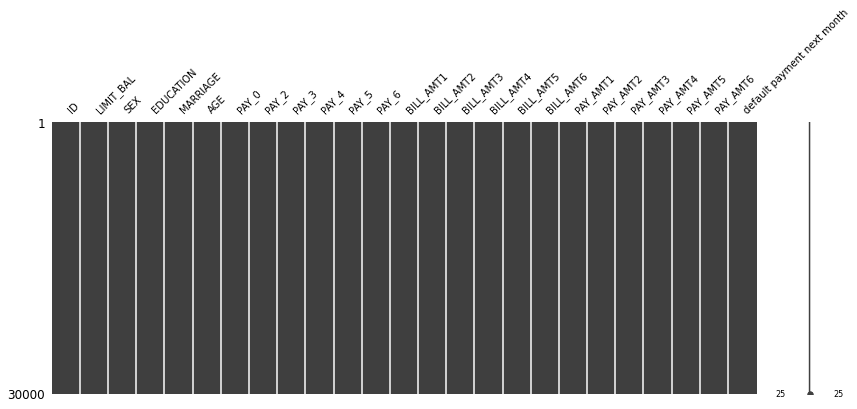

In [12]:
import missingno as msno
  
# Visualize missing values as a matrix
plt.figure(figsize=(100,3))
msno.matrix(dcc_df, figsize=(14,5), fontsize=10)

There is no NaN/ Null/ Missing Values in the data

In [13]:
# Getting the unique value count of each feature
dcc_df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

There are some features with value counts less than 20 which seems to be categorical features like Sex, Marriage, Education. We need to dive deep to understand them. If they are categorical, we will update their datatype to object datatype.

In [14]:
# Checking the duplicate values
# Storing the total duplicated values in the dataset in a variable
duplicate_value = dcc_df.duplicated().sum()
print('Total duplicated values in the dataset are:', duplicate_value)

Total duplicated values in the dataset are: 0


In [15]:
# Let's Rename the columns to readable
dcc_df.rename(columns={'LIMIT_BAL': 'credit_limit',
                   'SEX': 'gender',
                   'EDUCATION' : 'education',
                   'MARRIAGE' : 'marital_status',
                   'AGE' : 'age',
                   'PAY_0': 'payment_status_sept',
                   'PAY_2': 'payment_status_aug',
                   'PAY_3': 'payment_status_jul',
                   'PAY_4': 'payment_status_jun',
                   'PAY_5': 'payment_status_may',
                   'PAY_6': 'payment_status_apr',
                   'BILL_AMT1': 'bill_sept',
                   'BILL_AMT2': 'bill_aug',
                   'BILL_AMT3': 'bill_jul',
                   'BILL_AMT4': 'bill_jun',
                   'BILL_AMT5': 'bill_may',
                   'BILL_AMT6': 'bill_apr',
                   'PAY_AMT1': 'payment_amount_sept',
                   'PAY_AMT2': 'payment_amount_aug',
                   'PAY_AMT3': 'payment_amount_jul',
                   'PAY_AMT4': 'payment_amount_jun',
                   'PAY_AMT5': 'payment_amount_may',
                   'PAY_AMT6': 'payment_amount_apr',
                   'dpnm' : 'default_payment',
                   'default payment next month':'IsDefaulter'}, inplace=True)

In [16]:
# Converting the categorical features into object datatype
dcc_df[['gender','education','marital_status','payment_status_sept','payment_status_aug','payment_status_jul',
    'payment_status_jun','payment_status_may','payment_status_apr']] =dcc_df[['gender','education','marital_status','payment_status_sept','payment_status_aug','payment_status_jul',
    'payment_status_jun','payment_status_may','payment_status_apr']].apply(lambda x: x.astype('object'))

In [17]:
# Now checking whether the data types got updated or not
dcc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   30000 non-null  int64 
 1   credit_limit         30000 non-null  int64 
 2   gender               30000 non-null  object
 3   education            30000 non-null  object
 4   marital_status       30000 non-null  object
 5   age                  30000 non-null  int64 
 6   payment_status_sept  30000 non-null  object
 7   payment_status_aug   30000 non-null  object
 8   payment_status_jul   30000 non-null  object
 9   payment_status_jun   30000 non-null  object
 10  payment_status_may   30000 non-null  object
 11  payment_status_apr   30000 non-null  object
 12  bill_sept            30000 non-null  int64 
 13  bill_aug             30000 non-null  int64 
 14  bill_jul             30000 non-null  int64 
 15  bill_jun             30000 non-null  int64 
 16  bill

In [18]:
# Setting the id column as the index
dcc_df.set_index('ID', inplace = True)
dcc_df

,credit_limit,gender,education,marital_status,age,payment_status_sept,payment_status_aug,payment_status_jul,payment_status_jun,payment_status_may,...,bill_jun,bill_may,bill_apr,payment_amount_sept,payment_amount_aug,payment_amount_jul,payment_amount_jun,payment_amount_may,payment_amount_apr,IsDefaulter
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


### Catagorical Analysis

In [19]:
dcc_df['gender'].value_counts()

2    18112
1    11888
Name: gender, dtype: int64

In [20]:
dcc_df['marital_status'].value_counts()

2    15964
1    13659
3      323
0       54
Name: marital_status, dtype: int64

In [21]:
dcc_df['education'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64

# Exploratory Data Analysis